section 0 Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
  )
)
section 1 Sequential(
  (0): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
)
section 2 Sequential(
  (0): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, mome

ValueError: '==' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

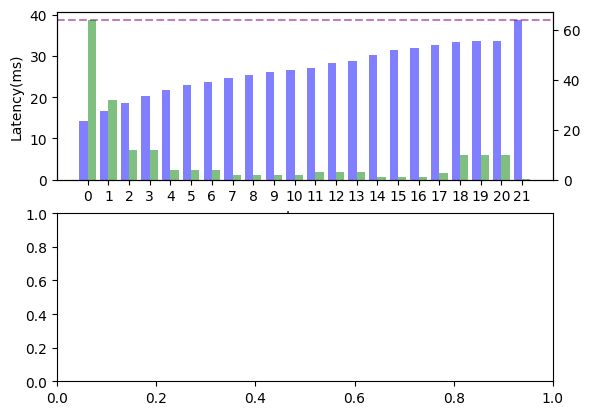

In [1]:
# this is for measuring the latency and bandwdith of the network
from Models import mobilenetv2, resnet
import torch
m_cifar = mobilenetv2.MobileNetV2_layers(num_classes=10)
m_imagenet = mobilenetv2.MobileNetV2_layers(num_classes=1000)
r_cifar = resnet.resnet_layers(num_classes=10, layers=[3, 4, 6, 3])
r_imagenet = resnet.resnet_layers(num_classes=1000, layers=[3, 4, 6, 3])

import torchsummary
torchsummary.summary(m_cifar, (3, 32, 32), device='cpu')
torchsummary.summary(m_imagenet, (3, 224, 224), device='cpu')
torchsummary.summary(r_cifar, (3, 32, 32), device='cpu')
torchsummary.summary(r_imagenet, (3, 224, 224), device='cpu')

import matplotlib.pyplot as plt
import numpy as np

# plot m for cifar
# plot r for imagenet

m_cifar_lat = np.array(m_cifar.infertime) * 1000
m_cifar_bw = np.array(m_cifar.infermemory) / 1024
m_cifar_lat_total = m_cifar_lat[-1]
m_cifar_bw_total = 32*32*3*4/1024

r_imagenet_lat = np.array(r_imagenet.infertime) * 1000
r_imagenet_bw = np.array(r_imagenet.infermemory) / 1024
r_imagenet_lat_total = r_imagenet_lat[-1]
r_imagenet_bw_total = 224*224*3*4/1024

# subplots

fig, axs = plt.subplots(2,1)
m_x = np.arange(len(m_cifar_lat))
r_x = np.arange(len(r_imagenet_lat))

axs[0].bar(m_x-0.2, m_cifar_lat, color='b',width=0.4,alpha=0.5)
# plot a line for the total latency
axs[0].axhline(y=m_cifar_lat_total, color='purple', linestyle='--',alpha=0.5)
axs[0].set_xlabel('Layer')
axs[0].set_ylabel('Latency(ms)')
axs[0].set_xticks(m_x)
axs[0].set_xticklabels(m_x)
axs_t = axs[0].twinx()
axs_t.bar(m_x+0.2, m_cifar_bw, color='g',width=0.4,alpha=0.5)
axs_t.axhline(y=m_cifar_bw_total, color='cyan', linestyle='==',alpha=0.5)
axs_t.set_ylabel('Size(KB)')
axs[0].legend(['Latency', 'Total latency'])
axs_t.legend(['Size'])

axs[1].bar(r_x-0.2, r_imagenet_lat, color='b',width=0.4,alpha=0.5)
# plot a line for the total latency
axs[1].axhline(y=r_imagenet_lat_total, color='purple', linestyle='--',alpha=0.5)
axs[1].set_xlabel('Layer')
axs[1].set_ylabel('Latency(ms)')
axs[1].set_xticks(r_x)
axs[1].set_xticklabels(r_x)
axs_t = axs[1].twinx()
axs_t.bar(r_x+0.2, r_imagenet_bw, color='g',width=0.4,alpha=0.5)
axs_t.axhline(y=r_imagenet_bw_total, color='cyan', linestyle='==',alpha=0.5)
axs_t.set_ylabel('Size(KB)')
axs[1].legend(['Latency'])
axs_t.legend(['Size'])

plt.show()